# Assignment 4 Extra Credit
## Tested With:
Using Python 3.7.1
```
cat ~/.pyenv/versions/3.7.1/lib/python3.7/site-packages/torch/version.py                                          
__version__ = '1.0.1.post2'
debug = False
cuda = '10.0.130'
```

In [2]:
import torch
import torchvision
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np

We can check the version that you are using by running the following. If it is not the same and things break I suggest using [PyEnv](https://github.com/pyenv/pyenv)

In [3]:
torch.version

<module 'torch.version' from '/home/walton/.pyenv/versions/3.7.1/lib/python3.7/site-packages/torch/version.py'>

Our first 4 examples will be with multi-layer perceptrons
- 1 layer of 16 hidden sigmoid units; no dropout
- 1 layer of 128 hidden sigmoid units; no dropout
- 1 layer 128 hidden ReLU; no dropout
- 1 layer of 128 hidden ReLu units; 50% dropout

Set the following variable to where you want to store the mnist files. We will default to `/tmp` because everyone can write there, but WARNING: it will get deleted at some point. 

In [4]:
save_mnist_to = "/tmp"

If you don't have CUDA set this to false

In [5]:
has_cuda = True

In [6]:
n_epochs = 3
batch_size_train = 64
batch_size_test = 1000
learning_rate = 0.01
momentum = 0.5
log_interval = 10

random_seed = 1
torch.backends.cudnn.enabled = has_cuda
torch.manual_seed(random_seed)

In [7]:
train_loader = torch.utils.data.DataLoader(
  torchvision.datasets.MNIST(save_mnist_to, train=True, download=True,
                             transform=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor(),
                               torchvision.transforms.Normalize(
                                 (0.1307,), (0.3081,))
                             ])),
  batch_size=batch_size_train, shuffle=True)

test_loader = torch.utils.data.DataLoader(
  torchvision.datasets.MNIST(save_mnist_to, train=False, download=True,
                             transform=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor(),
                               torchvision.transforms.Normalize(
                                 (0.1307,), (0.3081,))
                             ])),
  batch_size=batch_size_test, shuffle=True)
examples = enumerate(test_loader)
batch_idx, (example_data, example_targets) = next(examples)

100.1%

Extracting /tmp/MNIST/raw/train-images-idx3-ubyte.gz


28.4%

0.5%5%

Extracting /tmp/MNIST/raw/train-labels-idx1-ubyte.gz


100.4%

Extracting /tmp/MNIST/raw/t10k-images-idx3-ubyte.gz


180.4%

Extracting /tmp/MNIST/raw/t10k-labels-idx1-ubyte.gz
Processing...
Done!


# Let's make our 16 hidden sigmoid units

In [218]:
class ML_Perp_16(nn.Module):
    def __init__(self):
        super(ML_Perp_16, self).__init__()
        self.hidden = nn.Linear(28**2, 16, bias=True)
        self.output = nn.Linear(16,10)
        self.sigmoid = nn.Sigmoid()
        
    def forward(self,x):
        x = x.view(-1,28**2)
        x = torch.sigmoid(self.hidden(x))
        x = self.output(x)
        return x
        

In [219]:
ml_perp_16 = ML_Perp_16()
optimizer = optim.SGD(ml_perp_16.parameters(), lr=learning_rate, momentum=momentum)
print(ml_perp_16)

ML_Perp_16(
  (hidden): Linear(in_features=784, out_features=16, bias=True)
  (output): Linear(in_features=16, out_features=10, bias=True)
  (sigmoid): Sigmoid()
)


In [220]:
# utility containers to record how training process goes, used for later visulaztions
train_losses = []
train_counter = []
test_losses = []
test_counter = [i*len(train_loader.dataset) for i in range(n_epochs + 1)]

In [221]:
def train16(epoch):
  ml_perp_16.train()
  for batch_idx, (data, target) in enumerate(train_loader):
    optimizer.zero_grad()
    output = ml_perp_16(data)
    loss = F.nll_loss(output, target)
    loss.backward()
    optimizer.step()
    if batch_idx % log_interval == 0:
      print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
        epoch, batch_idx * len(data), len(train_loader.dataset),
        100. * batch_idx / len(train_loader), loss.item()))
      train_losses.append(loss.item())
      train_counter.append(
        (batch_idx*64) + ((epoch-1)*len(train_loader.dataset)))

In [222]:
def test16():
  ml_perp_16.eval()
  test_loss = 0
  correct = 0
  with torch.no_grad():
    for data, target in test_loader:
      output = ml_perp_16(data)
      test_loss += F.nll_loss(output, target, size_average=False).item()
      pred = output.data.max(1, keepdim=True)[1]
      correct += pred.eq(target.data.view_as(pred)).sum()
  test_loss /= len(test_loader.dataset)
  test_losses.append(test_loss)
  print('\nTest set: Avg. loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
    test_loss, correct, len(test_loader.dataset),
    100. * correct / len(test_loader.dataset)))

In [223]:
test16()
for epoch in range(1, n_epochs + 1):
  train16(epoch)
  test16()


Test set: Avg. loss: 0.0038, Accuracy: 908/10000 (9%)

Train Epoch: 1 [0/60000 (0%)]	Loss: -0.011549
Train Epoch: 1 [640/60000 (1%)]	Loss: -0.163570
Train Epoch: 1 [1280/60000 (2%)]	Loss: -0.300177
Train Epoch: 1 [1920/60000 (3%)]	Loss: -0.519367
Train Epoch: 1 [2560/60000 (4%)]	Loss: -0.742033
Train Epoch: 1 [3200/60000 (5%)]	Loss: -1.040966
Train Epoch: 1 [3840/60000 (6%)]	Loss: -1.369864
Train Epoch: 1 [4480/60000 (7%)]	Loss: -1.462947
Train Epoch: 1 [5120/60000 (9%)]	Loss: -1.582736
Train Epoch: 1 [5760/60000 (10%)]	Loss: -1.894293
Train Epoch: 1 [6400/60000 (11%)]	Loss: -2.242373
Train Epoch: 1 [7040/60000 (12%)]	Loss: -2.391904
Train Epoch: 1 [7680/60000 (13%)]	Loss: -2.633189
Train Epoch: 1 [8320/60000 (14%)]	Loss: -2.860665
Train Epoch: 1 [8960/60000 (15%)]	Loss: -3.341619
Train Epoch: 1 [9600/60000 (16%)]	Loss: -3.321482
Train Epoch: 1 [10240/60000 (17%)]	Loss: -3.886538
Train Epoch: 1 [10880/60000 (18%)]	Loss: -3.946773
Train Epoch: 1 [11520/60000 (19%)]	Loss: -4.188023
Trai

Train Epoch: 2 [42240/60000 (70%)]	Loss: -52.055107
Train Epoch: 2 [42880/60000 (71%)]	Loss: -53.337231
Train Epoch: 2 [43520/60000 (72%)]	Loss: -53.315926
Train Epoch: 2 [44160/60000 (74%)]	Loss: -53.437160
Train Epoch: 2 [44800/60000 (75%)]	Loss: -53.426025
Train Epoch: 2 [45440/60000 (76%)]	Loss: -53.741665
Train Epoch: 2 [46080/60000 (77%)]	Loss: -54.408836
Train Epoch: 2 [46720/60000 (78%)]	Loss: -55.018520
Train Epoch: 2 [47360/60000 (79%)]	Loss: -55.434914
Train Epoch: 2 [48000/60000 (80%)]	Loss: -55.307774
Train Epoch: 2 [48640/60000 (81%)]	Loss: -55.893669
Train Epoch: 2 [49280/60000 (82%)]	Loss: -55.755417
Train Epoch: 2 [49920/60000 (83%)]	Loss: -56.478550
Train Epoch: 2 [50560/60000 (84%)]	Loss: -57.216431
Train Epoch: 2 [51200/60000 (85%)]	Loss: -57.014980
Train Epoch: 2 [51840/60000 (86%)]	Loss: -57.173512
Train Epoch: 2 [52480/60000 (87%)]	Loss: -57.504681
Train Epoch: 2 [53120/60000 (88%)]	Loss: -58.319572
Train Epoch: 2 [53760/60000 (90%)]	Loss: -58.451897
Train Epoch:

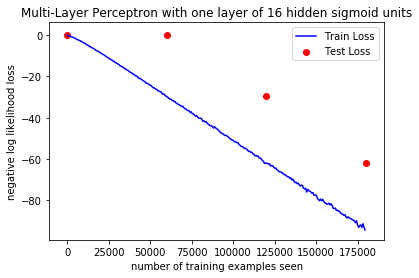

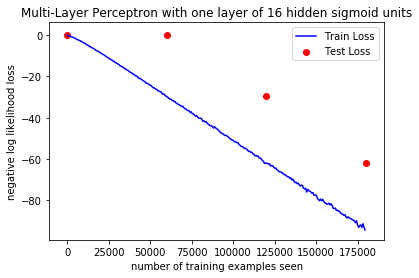

In [54]:
try:
    assert(len(train_counter) == len(train_losses)),"Training counter and losses are not the same size"
except AssertionError:
    print("Length Training Counter:",len(train_counter),"\nLength Training Losses:",len(train_losses))
try:
    assert(len(test_counter) == len(test_losses)-1),"Testing counter and losses are not the same size"
except AssertionError:
    print("Length Testing Counter:",len(test_counter),"\nLength Testing Losses:",len(test_losses))
fig = plt.figure()
plt.plot(train_counter, train_losses, color='blue')
plt.scatter(test_counter, test_losses[:-1], color='red')
plt.legend(['Train Loss', 'Test Loss'], loc='upper right')
plt.title('Multi-Layer Perceptron with one layer of 16 hidden sigmoid units')
plt.xlabel('number of training examples seen')
plt.ylabel('negative log likelihood loss')
fig

# Let's make our 128 hidden sigmoid units

In [76]:
class ML_Perp_128(nn.Module):
    def __init__(self):
        super(ML_Perp_128, self).__init__()
        self.hidden = nn.Linear(28**2, 128, bias=True)
        self.output = nn.Linear(128,10)
        self.sigmoid = nn.Sigmoid()
        
    def forward(self,x):
        x = x.view(-1,28**2)
        x = torch.sigmoid(self.hidden(x))
        x = self.output(x)
        return x
    
ml_perp_128 = ML_Perp_128()
optimizer = optim.SGD(ml_perp_128.parameters(), lr=learning_rate, momentum=momentum)
# utility containers to record how training process goes, used for later visulaztions
train_losses = []
train_counter = []
test_losses = []
test_counter = [i*len(train_loader.dataset) for i in range(n_epochs + 1)]   

def train128(epoch):
  ml_perp_128.train()
  for batch_idx, (data, target) in enumerate(train_loader):
    optimizer.zero_grad()
    output = ml_perp_128(data)
    loss = F.nll_loss(output, target)
    loss.backward()
    optimizer.step()
    if batch_idx % log_interval == 0:
      print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
        epoch, batch_idx * len(data), len(train_loader.dataset),
        100. * batch_idx / len(train_loader), loss.item()))
      train_losses.append(loss.item())
      train_counter.append(
        (batch_idx*64) + ((epoch-1)*len(train_loader.dataset)))
    
def test128():
  ml_perp_128.eval()
  test_loss = 0
  correct = 0
  with torch.no_grad():
    for data, target in test_loader:
      output = ml_perp_128(data)
      test_loss += F.nll_loss(output, target, size_average=False).item()
      pred = output.data.max(1, keepdim=True)[1]
      correct += pred.eq(target.data.view_as(pred)).sum()
  test_loss /= len(test_loader.dataset)
  test_losses.append(test_loss)
  print('\nTest set: Avg. loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
    test_loss, correct, len(test_loader.dataset),
    100. * correct / len(test_loader.dataset)))

ML_Perp_128(
  (hidden): Linear(in_features=784, out_features=128, bias=True)
  (output): Linear(in_features=128, out_features=10, bias=True)
  (sigmoid): Sigmoid()
)


In [77]:
test128()
for epoch in range(1, n_epochs + 1):
  train128(epoch)
  test128()


Test set: Avg. loss: 0.0731, Accuracy: 943/10000 (9%)

Train Epoch: 1 [0/60000 (0%)]	Loss: 0.075642
Train Epoch: 1 [640/60000 (1%)]	Loss: -0.697810
Train Epoch: 1 [1280/60000 (2%)]	Loss: -1.421579
Train Epoch: 1 [1920/60000 (3%)]	Loss: -2.543754
Train Epoch: 1 [2560/60000 (4%)]	Loss: -3.695358
Train Epoch: 1 [3200/60000 (5%)]	Loss: -5.179857
Train Epoch: 1 [3840/60000 (6%)]	Loss: -7.205937
Train Epoch: 1 [4480/60000 (7%)]	Loss: -9.322045
Train Epoch: 1 [5120/60000 (9%)]	Loss: -11.574141
Train Epoch: 1 [5760/60000 (10%)]	Loss: -13.683453
Train Epoch: 1 [6400/60000 (11%)]	Loss: -16.079165
Train Epoch: 1 [7040/60000 (12%)]	Loss: -18.424147
Train Epoch: 1 [7680/60000 (13%)]	Loss: -21.031534
Train Epoch: 1 [8320/60000 (14%)]	Loss: -23.836123
Train Epoch: 1 [8960/60000 (15%)]	Loss: -26.260965
Train Epoch: 1 [9600/60000 (16%)]	Loss: -28.293486
Train Epoch: 1 [10240/60000 (17%)]	Loss: -31.024702
Train Epoch: 1 [10880/60000 (18%)]	Loss: -33.940151
Train Epoch: 1 [11520/60000 (19%)]	Loss: -36.0

Train Epoch: 2 [39040/60000 (65%)]	Loss: -393.430878
Train Epoch: 2 [39680/60000 (66%)]	Loss: -390.428070
Train Epoch: 2 [40320/60000 (67%)]	Loss: -398.059601
Train Epoch: 2 [40960/60000 (68%)]	Loss: -399.709778
Train Epoch: 2 [41600/60000 (69%)]	Loss: -399.323151
Train Epoch: 2 [42240/60000 (70%)]	Loss: -399.808960
Train Epoch: 2 [42880/60000 (71%)]	Loss: -409.391083
Train Epoch: 2 [43520/60000 (72%)]	Loss: -406.571136
Train Epoch: 2 [44160/60000 (74%)]	Loss: -406.476715
Train Epoch: 2 [44800/60000 (75%)]	Loss: -415.450928
Train Epoch: 2 [45440/60000 (76%)]	Loss: -420.856842
Train Epoch: 2 [46080/60000 (77%)]	Loss: -419.908752
Train Epoch: 2 [46720/60000 (78%)]	Loss: -423.124695
Train Epoch: 2 [47360/60000 (79%)]	Loss: -425.279694
Train Epoch: 2 [48000/60000 (80%)]	Loss: -426.779510
Train Epoch: 2 [48640/60000 (81%)]	Loss: -431.663544
Train Epoch: 2 [49280/60000 (82%)]	Loss: -431.267151
Train Epoch: 2 [49920/60000 (83%)]	Loss: -438.390533
Train Epoch: 2 [50560/60000 (84%)]	Loss: -437.

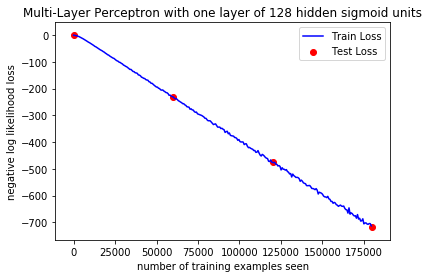

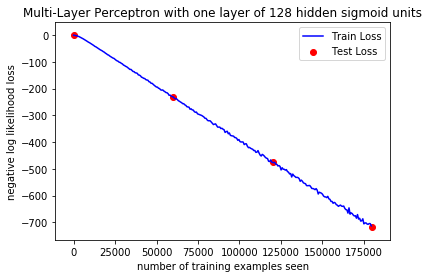

In [80]:
try:
    assert(len(train_counter) == len(train_losses)),"Training counter and losses are not the same size"
except AssertionError:
    print("Length Training Counter:",len(train_counter),"\nLength Training Losses:",len(train_losses))
try:
    assert(len(test_counter) == len(test_losses)),"Testing counter and losses are not the same size"
except AssertionError:
    print("Length Testing Counter:",len(test_counter),"\nLength Testing Losses:",len(test_losses))
fig = plt.figure()
plt.plot(train_counter, train_losses, color='blue')
plt.scatter(test_counter, test_losses, color='red')
plt.legend(['Train Loss', 'Test Loss'], loc='upper right')
plt.title('Multi-Layer Perceptron with one layer of 128 hidden sigmoid units')
plt.xlabel('number of training examples seen')
plt.ylabel('negative log likelihood loss')
fig

# Let's make our 128 hidden ReLU units

In [175]:
class ML_Perp_128_ReLU(nn.Module):
    def __init__(self):
        super(ML_Perp_128_ReLU, self).__init__()
        self.hidden = nn.Linear(28**2, 128, bias=True)
        self.output = nn.Linear(128,10)
        self.ReLU = nn.ReLU()
        
    def forward(self,x):
        x = x.view(-1,28**2)
        x = F.relu(self.hidden(x))
        x = self.output(x)
        return x
    
ml_perp_128_ReLU = ML_Perp_128_ReLU()
optimizer = optim.SGD(ml_perp_128_ReLU.parameters(), lr=learning_rate, momentum=momentum)
# utility containers to record how training process goes, used for later visulaztions
train_losses = []
train_counter = []
test_losses = []
test_counter = [i*len(train_loader.dataset) for i in range(n_epochs + 1)]   

def train128_ReLU(epoch):
  ml_perp_128_ReLU.train()
  for batch_idx, (data, target) in enumerate(train_loader):
    optimizer.zero_grad()
    output = ml_perp_128_ReLU(data)
    loss = F.nll_loss(output, target)
    loss.backward()
    optimizer.step()
    if batch_idx % log_interval == 0:
      print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
        epoch, batch_idx * len(data), len(train_loader.dataset),
        100. * batch_idx / len(train_loader), loss.item()))
      train_losses.append(loss.item())
      train_counter.append(
        (batch_idx*64) + ((epoch-1)*len(train_loader.dataset)))
    
def test128_ReLU():
  ml_perp_128_ReLU.eval()
  test_loss = 0
  correct = 0
  with torch.no_grad():
    for data, target in test_loader:
      output = ml_perp_128_ReLU(data)
      test_loss += F.nll_loss(output, target, size_average=False).item()
      pred = output.data.max(1, keepdim=True)[1]
      correct += pred.eq(target.data.view_as(pred)).sum()
  test_loss /= len(test_loader.dataset)
  test_losses.append(test_loss)
  print('\nTest set: Avg. loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
    test_loss, correct, len(test_loader.dataset),
    100. * correct / len(test_loader.dataset)))

In [176]:
test128_ReLU()
for epoch in range(1, n_epochs + 1):
  train128_ReLU(epoch)
  test128_ReLU()


Test set: Avg. loss: 0.0409, Accuracy: 868/10000 (8%)

Train Epoch: 1 [0/60000 (0%)]	Loss: 0.041911
Train Epoch: 1 [640/60000 (1%)]	Loss: -1.169886
Train Epoch: 1 [1280/60000 (2%)]	Loss: -6.100059
Train Epoch: 1 [1920/60000 (3%)]	Loss: -30.092648
Train Epoch: 1 [2560/60000 (4%)]	Loss: -168.698776
Train Epoch: 1 [3200/60000 (5%)]	Loss: -946.748108
Train Epoch: 1 [3840/60000 (6%)]	Loss: -4710.448730
Train Epoch: 1 [4480/60000 (7%)]	Loss: -26182.224609
Train Epoch: 1 [5120/60000 (9%)]	Loss: -164399.671875
Train Epoch: 1 [5760/60000 (10%)]	Loss: -845901.000000
Train Epoch: 1 [6400/60000 (11%)]	Loss: -4835787.000000
Train Epoch: 1 [7040/60000 (12%)]	Loss: -27830012.000000
Train Epoch: 1 [7680/60000 (13%)]	Loss: -150311632.000000
Train Epoch: 1 [8320/60000 (14%)]	Loss: -865261248.000000
Train Epoch: 1 [8960/60000 (15%)]	Loss: -4639430656.000000
Train Epoch: 1 [9600/60000 (16%)]	Loss: -23087820800.000000
Train Epoch: 1 [10240/60000 (17%)]	Loss: -130135654400.000000
Train Epoch: 1 [10880/6000

Train Epoch: 2 [39040/60000 (65%)]	Loss: nan
Train Epoch: 2 [39680/60000 (66%)]	Loss: nan
Train Epoch: 2 [40320/60000 (67%)]	Loss: nan
Train Epoch: 2 [40960/60000 (68%)]	Loss: nan
Train Epoch: 2 [41600/60000 (69%)]	Loss: nan
Train Epoch: 2 [42240/60000 (70%)]	Loss: nan
Train Epoch: 2 [42880/60000 (71%)]	Loss: nan
Train Epoch: 2 [43520/60000 (72%)]	Loss: nan
Train Epoch: 2 [44160/60000 (74%)]	Loss: nan
Train Epoch: 2 [44800/60000 (75%)]	Loss: nan
Train Epoch: 2 [45440/60000 (76%)]	Loss: nan
Train Epoch: 2 [46080/60000 (77%)]	Loss: nan
Train Epoch: 2 [46720/60000 (78%)]	Loss: nan
Train Epoch: 2 [47360/60000 (79%)]	Loss: nan
Train Epoch: 2 [48000/60000 (80%)]	Loss: nan
Train Epoch: 2 [48640/60000 (81%)]	Loss: nan
Train Epoch: 2 [49280/60000 (82%)]	Loss: nan
Train Epoch: 2 [49920/60000 (83%)]	Loss: nan
Train Epoch: 2 [50560/60000 (84%)]	Loss: nan
Train Epoch: 2 [51200/60000 (85%)]	Loss: nan
Train Epoch: 2 [51840/60000 (86%)]	Loss: nan
Train Epoch: 2 [52480/60000 (87%)]	Loss: nan
Train Epoc

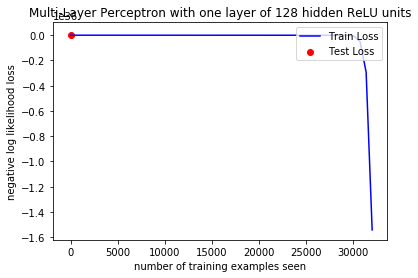

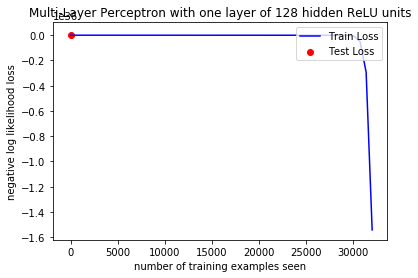

In [88]:
try:
    assert(len(train_counter) == len(train_losses)),"Training counter and losses are not the same size"
except AssertionError:
    print("Length Training Counter:",len(train_counter),"\nLength Training Losses:",len(train_losses))
try:
    assert(len(test_counter) == len(test_losses)),"Testing counter and losses are not the same size"
except AssertionError:
    print("Length Testing Counter:",len(test_counter),"\nLength Testing Losses:",len(test_losses))
fig = plt.figure()
plt.plot(train_counter, train_losses, color='blue')
plt.scatter(test_counter, test_losses, color='red')
plt.legend(['Train Loss', 'Test Loss'], loc='upper right')
plt.title('Multi-Layer Perceptron with one layer of 128 hidden ReLU units')
plt.xlabel('number of training examples seen')
plt.ylabel('negative log likelihood loss')
fig

# Now let's do Convolutional Networks with 128 hidden ReLU units with 50% Dropout

In [12]:
class ML_Perp_128_ReLU_DO(nn.Module):
    def __init__(self):
        super(ML_Perp_128_ReLU_DO, self).__init__()
        self.hidden = nn.Linear(28**2, 128, bias=True)
        self.hidden_drop = nn.Dropout(p=0.5)
        self.output = nn.Linear(128,10)
        self.ReLU = nn.ReLU()
        
    def forward(self,x):
        x = x.view(-1,28**2)
        x = F.relu(self.hidden(x))
        x = F.dropout(x,training=self.training)
        x = self.output(x)
        return nn.Softmax(x)
    
ml_perp_128_ReLU_DO = ML_Perp_128_ReLU_DO()
optimizer = optim.SGD(ml_perp_128_ReLU_DO.parameters(), lr=learning_rate, momentum=momentum)
# utility containers to record how training process goes, used for later visulaztions
train_losses = []
train_counter = []
test_losses = []
test_counter = [i*len(train_loader.dataset) for i in range(n_epochs + 1)]   

def train128_ReLU_DO(epoch):
  ml_perp_128_ReLU_DO.train()
  for batch_idx, (data, target) in enumerate(train_loader):
    optimizer.zero_grad()
    output = ml_perp_128_ReLU_DO(data)
    loss = F.nll_loss(output, target)
    loss.backward()
    optimizer.step()
    if batch_idx % log_interval == 0:
      print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
        epoch, batch_idx * len(data), len(train_loader.dataset),
        100. * batch_idx / len(train_loader), loss.item()))
      train_losses.append(loss.item())
      train_counter.append(
        (batch_idx*64) + ((epoch-1)*len(train_loader.dataset)))
    
def test128_ReLU_DO():
  ml_perp_128_ReLU_DO.eval()
  test_loss = 0
  correct = 0
  with torch.no_grad():
    for data, target in test_loader:
      output = ml_perp_128_ReLU_DO(data)
      test_loss += F.nll_loss(output, target, size_average=False).item()
      pred = output.data.max(1, keepdim=True)[1]
      correct += pred.eq(target.data.view_as(pred)).sum()
  test_loss /= len(test_loader.dataset)
  test_losses.append(test_loss)
  print('\nTest set: Avg. loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
    test_loss, correct, len(test_loader.dataset),
    100. * correct / len(test_loader.dataset)))

In [13]:
test128_ReLU_DO()
for epoch in range(1, n_epochs + 1):
  train128_ReLU_DO(epoch)
  test128_ReLU_DO()

/home/walton/.pyenv/versions/3.7.1/lib/python3.7/site-packages/torch/nn/_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


TypeError: 'Tensor' object is not callable

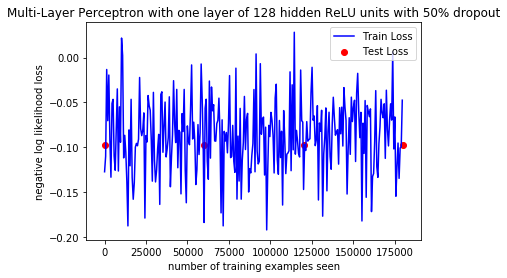

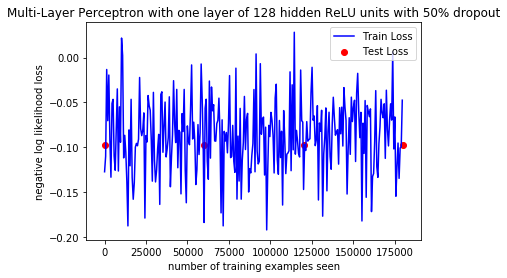

In [93]:
try:
    assert(len(train_counter) == len(train_losses)),"Training counter and losses are not the same size"
except AssertionError:
    print("Length Training Counter:",len(train_counter),"\nLength Training Losses:",len(train_losses))
try:
    assert(len(test_counter) == len(test_losses)),"Testing counter and losses are not the same size"
except AssertionError:
    print("Length Testing Counter:",len(test_counter),"\nLength Testing Losses:",len(test_losses))
fig = plt.figure()
plt.plot(train_counter, train_losses, color='blue')
plt.scatter(test_counter, test_losses, color='red')
plt.legend(['Train Loss', 'Test Loss'], loc='upper right')
plt.title('Multi-Layer Perceptron with one layer of 128 hidden ReLU units with 50% dropout')
plt.xlabel('number of training examples seen')
plt.ylabel('negative log likelihood loss')
fig

### Now let's do a 2D Convolutional with 1 layer of 128 ReLU units and 50% dropout

In [8]:
class Conv_DO50(nn.Module):
    def __init__(self):
        super(Conv_DO50, self).__init__()
        self.conv = nn.Sequential(nn.Conv2d(1,10, kernel_size=5),
                                  nn.ReLU())
        #self.conv = nn.Conv2d(28**2,128, kernel_size=5)
        #self.conv_drop = nn.Dropout2d(p=0.5)
        self.conv_drop = nn.Dropout(p=0.5)
        #self.output = nn.Linear(128,10)
        #self.fc1 = nn.Linear(320,50)
        #self.fc2 = nn.Linear(50,10)
        self.fc = nn.Linear(128,1000)
        #self.fc2 = nn.Linear(1000,10)
        #self.fc1 = nn.Linear(28**2,128)
        #self.fc2 = nn.Linear(128,10)
        
    def forward(self,x):
        #x = F.relu(self.conv_drop(self.conv(x)))
        x = self.conv(x)
        #x = F.relu(F.max_pool2d(self.conv(x),2))
        x = x.view(-1,128)
        #x = x.view(-1,28**2)
        #x = F.relu(self.conv_drop(self.conv(x)))
        # = x.view(1000,28**2)
        # = x.view(-1,320)
        #x = F.relu(self.fc1(x))
        #x = F.relu(self.output(x))
        #x = F.relu(self.fc1(x))
        x = F.dropout(x,training=self.training)
        #x = self.fc2(x)
        #x = self.output(x)
        x = self.fc(x)
        #x = self.fc2(x)
        return x
    
conv_do50 = Conv_DO50()
optimizer = optim.SGD(conv_do50.parameters(), lr=learning_rate, momentum=momentum)
print(conv_do50)
# utility containers to record how training process goes, used for later visulaztions
train_losses = []
train_counter = []
test_losses = []
test_counter = [i*len(train_loader.dataset) for i in range(n_epochs + 1)]   

def train_conv_do50(epoch):
  conv_do50.train()
  for batch_idx, (data, target) in enumerate(train_loader):
    optimizer.zero_grad()
    output = conv_do50(data)
    loss = F.nll_loss(output, target)
    loss.backward()
    optimizer.step()
    if batch_idx % log_interval == 0:
      print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
        epoch, batch_idx * len(data), len(train_loader.dataset),
        100. * batch_idx / len(train_loader), loss.item()))
      train_losses.append(loss.item())
      train_counter.append(
        (batch_idx*64) + ((epoch-1)*len(train_loader.dataset)))
    
def test_conv_do50():
  conv_do50.eval()
  test_loss = 0
  correct = 0
  with torch.no_grad():
    for data, target in test_loader:
      output = conv_do50(data)
      test_loss += F.nll_loss(output, target, size_average=False).item()
      pred = output.data.max(1, keepdim=True)[1]
      correct += pred.eq(target.data.view_as(pred)).sum()
  test_loss /= len(test_loader.dataset)
  test_losses.append(test_loss)
  print('\nTest set: Avg. loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
    test_loss, correct, len(test_loader.dataset),
    100. * correct / len(test_loader.dataset)))

Conv_DO50(
  (conv): Sequential(
    (0): Conv2d(1, 10, kernel_size=(5, 5), stride=(1, 1))
    (1): ReLU()
  )
  (conv_drop): Dropout(p=0.5)
  (fc): Linear(in_features=128, out_features=1000, bias=True)
)


In [243]:
test_conv_do50()
for epoch in range(1, n_epochs + 1):
  train_conv_do50(epoch)
  test_conv_do50()

ValueError: Expected input batch_size (45000) to match target batch_size (1000).